In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\amany\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


In [2]:
df = pd.read_csv('D:\Mortgage Loan Default Risk Prediction\data\Processed_data.csv')

In [3]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoanToIncome,EmploymentRatio,CreditUtilizationProxy
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.588262,1.428571,10117.40
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,2.467481,0.217391,62220.00
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,1.534154,0.565217,32297.00
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,1.412638,0.000000,11199.75
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.447179,0.133333,1827.80


In [4]:
X = df.drop('Default', axis = 1)
y = df['Default']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [6]:
numeric_features  = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [8]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter = 1000, class_weight='balanced'))
])

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'LoanToIncome', 'EmploymentRatio', 'CreditUtilizationProxy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [11]:
print(classification_report(y_test, y_pred))
print('ROC-AUC', roc_auc_score(y_test, y_pred))
print('confusion_matrix: \n', confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     45139
           1       0.23      0.70      0.34      5931

    accuracy                           0.69     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.69      0.75     51070

ROC-AUC 0.6935820630023877
confusion_matrix: 
 [[31145 13994]
 [ 1796  4135]]


In [12]:
import numpy as np
y_pred_custom = (y_prob > 0.6).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     45139
           1       0.28      0.55      0.37      5931

    accuracy                           0.79     51070
   macro avg       0.61      0.68      0.62     51070
weighted avg       0.86      0.79      0.81     51070

[[36948  8191]
 [ 2684  3247]]


In [13]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=60,      # reduce trees
        max_depth=8,          # limit depth
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42,
        n_jobs=-1
    ))
])

In [14]:
rf_model.fit(X_train, y_train)

y_prob_rf = rf_model.predict_proba(X_test)[:,1]
print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

RF ROC-AUC: 0.7495176227585353


In [15]:
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45139
           1       0.73      0.01      0.02      5931

    accuracy                           0.88     51070
   macro avg       0.81      0.50      0.48     51070
weighted avg       0.87      0.88      0.83     51070

[[45117    22]
 [ 5870    61]]


In [16]:
import numpy as np

y_pred_custom = (y_prob_rf > 0.3).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.50      0.11      0.18      5931

    accuracy                           0.88     51070
   macro avg       0.70      0.55      0.56     51070
weighted avg       0.85      0.88      0.85     51070

[[44478   661]
 [ 5268   663]]


In [17]:
import numpy as np

y_pred_custom = (y_prob_rf > 0.4).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.64      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070

[[44978   161]
 [ 5641   290]]


In [18]:
y_pred_custom = (y_prob_rf > 0.2).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     45139
           1       0.36      0.30      0.33      5931

    accuracy                           0.86     51070
   macro avg       0.64      0.62      0.62     51070
weighted avg       0.85      0.86      0.85     51070

[[41942  3197]
 [ 4127  1804]]


In [23]:
import joblib
loaded_model  = joblib.dump(rf_model, "D:\Mortgage Loan Default Risk Prediction\mortgage_default_model.pkl", compress = 5)

In [20]:
import os
print(f"Current Directory: {os.getcwd()}")
print(f"File exists here: {os.path.exists('mortgage_default_model.pkl')}")

Current Directory: C:\Users\amany
File exists here: False


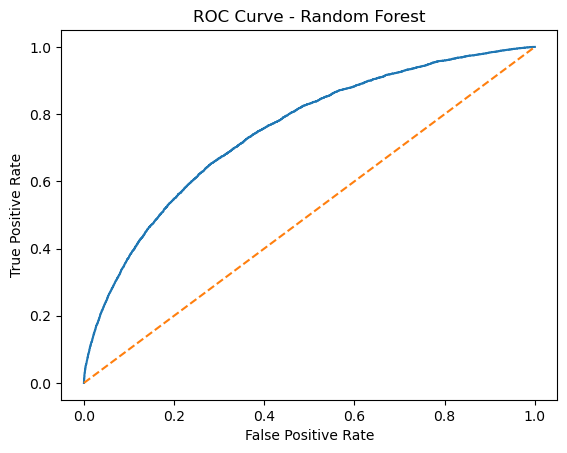

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()

In [22]:
rf = rf_model.named_steps['classifier']
importances = rf.feature_importances_

feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))

                        Feature  Importance
0                      num__Age    0.232306
9             num__LoanToIncome    0.215402
6             num__InterestRate    0.149402
1                   num__Income    0.103830
4           num__MonthsEmployed    0.077434
2               num__LoanAmount    0.049318
10         num__EmploymentRatio    0.046744
11  num__CreditUtilizationProxy    0.030027
3              num__CreditScore    0.017315
8                 num__DTIRatio    0.008352
